# Introduction to PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [3]:
pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.9/648.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.1/979.1 kB 31.4 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [4]:
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

experiment = Experiment(
  api_key="x1zcDMurBVnC0UvMYqaWeYXxW",
  project_name="morphophen",
  workspace="amoses-a"
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/amoses-a/morphophen/1ee7a9ff3d0044d29465987086d3d51a



### Loading the MedicalMNIST dataset

In [ ]:
# Let's download the MedicalMNIST dataset
!gdown 1sNq_Roc-XogRsFI7DDN8xjsHAQChqmgi
!unzip MedicalMNIST.zip -d /medical_mnist

Streaming output truncated to the last 5000 lines.
  inflating: /medical_mnist/HeadCT/005000.jpeg  
  inflating: /medical_mnist/HeadCT/005001.jpeg  
  inflating: /medical_mnist/HeadCT/005002.jpeg  
  inflating: /medical_mnist/HeadCT/005003.jpeg  
  inflating: /medical_mnist/HeadCT/005004.jpeg  
  inflating: /medical_mnist/HeadCT/005005.jpeg  
  inflating: /medical_mnist/HeadCT/005006.jpeg  
  inflating: /medical_mnist/HeadCT/005007.jpeg  
  inflating: /medical_mnist/HeadCT/005008.jpeg  
  inflating: /medical_mnist/HeadCT/005009.jpeg  
  inflating: /medical_mnist/HeadCT/005010.jpeg  
  inflating: /medical_mnist/HeadCT/005011.jpeg  
  inflating: /medical_mnist/HeadCT/005012.jpeg  
  inflating: /medical_mnist/HeadCT/005013.jpeg  
  inflating: /medical_mnist/HeadCT/005014.jpeg  
  inflating: /medical_mnist/HeadCT/005015.jpeg  
  inflating: /medical_mnist/HeadCT/005016.jpeg  
  inflating: /medical_mnist/HeadCT/005017.jpeg  
  inflating: /medical_mnist/HeadCT/005018.jpeg  
  inflating: /medi

In [ ]:
import os

# Define the directory containing your image folders
base_dir = '/medical_mnist'

# Initialize lists to store file paths and labels
file_paths = []
labels = []

# Walk through the directories
for root, dirs, files in os.walk(base_dir):
    # Iterate over files in each directory
    for file in files:

        # Get the file path
        file_path = os.path.join(root, file)

        # Append the file path to the list
        file_paths.append(file_path)

        # Extract the label from the folder name
        label = os.path.basename(root)

        # Append the label to the labels list
        labels.append(label)



In [ ]:
#@title Load the whole dataset in memory - Expand to see code
# import numpy as np
# from PIL import Image
# from tqdm import tqdm # This is optional. We can use it to show the progress and time estimation of our for loops
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

# # Initialize two lists to keep all images and labels
# X = []
# y = []

# for (file_path, label) in tqdm(zip(file_paths, labels), total=len(file_paths)):

#     img = Image.open(file_path)
#     img = np.asarray(img, dtype="int32")

#     X.append(img)
#     y.append(label)

# X = np.stack(X)

# le = LabelEncoder()
# y = le.fit_transform(y)

# Load the whole dataset in memory
# # Split: 80 / 20
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# # Further split the test set (20%) into 10%/10% for validation/testing
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

# # Input shape
# num_pixels = X_train.shape[1] * X_train.shape[2] # 64 * 64 = 4096 pixels

# # Number of classes
# num_classes = np.unique(y).shape[0]

# # Visualize few images

# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 5, figsize=(10, 5),
#                          subplot_kw={'xticks':[], 'yticks':[]},
#                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(X_train[i], cmap='gray', interpolation='nearest')
#     ax.text(0.05, 0.05, le.inverse_transform([y_train[i]]).item(),
#             transform=ax.transAxes, color='green')

# plt.show()

# X_train.shape, X_val.shape, X_test.shape


# # Let's define our Data
# # We have Χ (features - raw images) and y (labels) in numpy arrays

# # CAREFUL: If we were working with pandas DataFrame we would use .iloc[]
# # If we had to read images from drive, we would use Image.open() etc

# # We employ subclassing to torch.utils.data.Dataset
# class Dataset(torch.utils.data.Dataset):
#     def __init__(
#         self,
#         images,
#         labels,
#         transform=None
#     ):
#         self.images = images
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):

#         # image = self.images[idx].astype('float32')
#         # image = torch.from_numpy(image)
#         image = Image.fromarray(self.images[idx].astype('uint8'), 'L') # 'L' mode is for grayscale. Use 'RGB' for color images.

#         label = self.labels[idx]


#         if self.transform:
#             image = self.transform(image)

#         return image, label

# from torch.utils.data import DataLoader
# from torchvision import transforms

# # Define your transform
# transform = transforms.Compose([
#     transforms.ToTensor(),  # Automatically adds channel dimension for grayscale images
#     # Add any other transforms here
# ])


# # Initialize the datasets
# train_iterator = Dataset(X_train, y_train, transform=transform)
# val_iterator = Dataset(X_val, y_val, transform=transform)
# test_iterator = Dataset(X_test, y_test, transform=transform)

# batch_size = 128

# # Create DataLoaders
# train_dataloader = DataLoader(train_iterator, batch_size=batch_size, shuffle=True)
# val_dataloader = DataLoader(val_iterator, batch_size=batch_size, shuffle=False)
# test_dataloader = DataLoader(test_iterator, batch_size=batch_size, shuffle=False)

# # Demonstrate dataloaders
# for image, label in train_dataloader:
#   print(image.shape)
#   break

In [ ]:
#@title Load dataset on the fly

from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

# First, encode your labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Split your dataset file paths and labels into training and testing sets
file_paths_train, file_paths_test, labels_train, labels_test = train_test_split(file_paths, y, test_size=0.2, random_state=42)

# Further split the test set into validation/testing (10%/10% of the original dataset)
file_paths_val, file_paths_test, labels_val, labels_test = train_test_split(file_paths_test, labels_test, test_size=0.5, random_state=42)

class OnTheFlyDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        # Load image on-the-fly
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert('L')  # Convert to grayscale; use convert('RGB') for color images.
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label



In [ ]:
# Define your transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the images to tensors
    # Add any other transforms here
])

# Initialize the datasets
train_dataset = OnTheFlyDataset(file_paths_train, labels_train, transform=transform)
val_dataset = OnTheFlyDataset(file_paths_val, labels_val, transform=transform)
test_dataset = OnTheFlyDataset(file_paths_test, labels_test, transform=transform)

# Create DataLoaders
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Now, when you iterate over the DataLoader, images will be loaded and processed on-the-fly

# Demonstrate dataloaders
for image, label in train_dataloader:
  print(image.shape)
  break

torch.Size([128, 1, 64, 64])


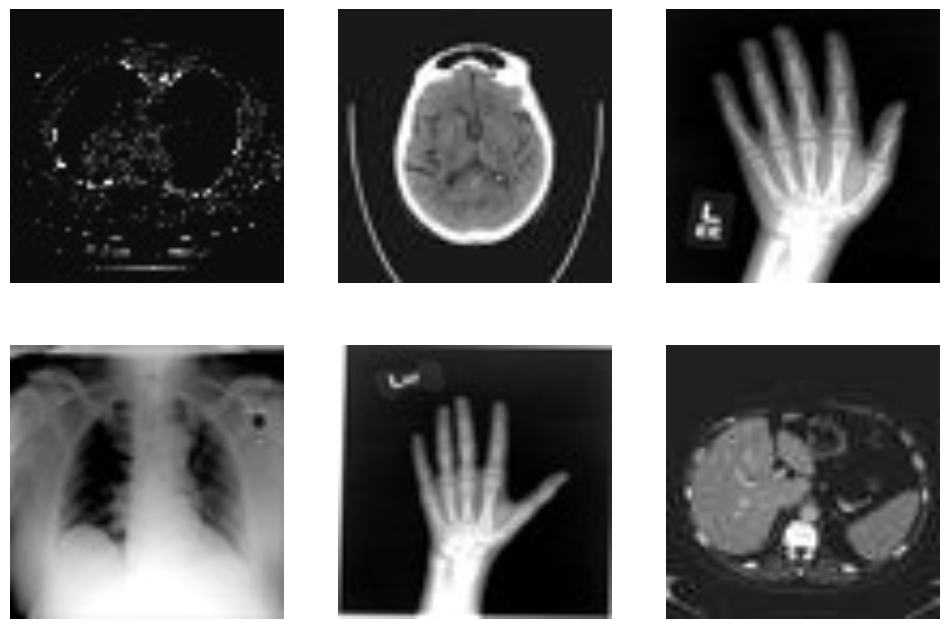

In [ ]:
def plot_simple_images(dataloader):
    images, _ = next(iter(dataloader))  # Get the first batch of images
    plt.figure(figsize=(12, 8))  # Set the figure size

    for i in range(6):  # Display the first 6 images
        ax = plt.subplot(2, 3, i + 1)  # Arrange images in 2 rows and 3 columns
        plt.imshow(images[i][0], cmap='gray', interpolation='bilinear')  # Display images; assuming grayscale for visualization
        plt.axis('off')  # Hide axes for clarity

    plt.show()

plot_simple_images(train_dataloader)

**Add transforms in the dataloaders --> DATA AUGMENTATION**

In [ ]:
# # Define transforms for data augmentation
# train_transforms = transforms.Compose([
#     transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
#     transforms.RandomRotation(10),  # Randomly rotate the image by up to 10 degrees
#     transforms.RandomResizedCrop(64, scale=(0.9, 1.0)),  # Randomly crop and resize the image
#     # transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),  # Randomly change brightness, contrast, and saturation
#     transforms.Resize((64, 64)),  # Resize the image
#     transforms.ToTensor(),  # Convert the images to tensors
#     # transforms.Normalize((0.5,), (0.5,))  # Normalize the tensors
# ])

# # For validation and testing datasets, you might want to apply only basic transformations
# # without augmentation to maintain the original characteristics of the images.
# val_test_transforms = transforms.Compose([
#     transforms.Resize((64, 64)),  # Resize the image
#     transforms.ToTensor(),  # Convert the images to tensors
#     # transforms.Normalize((0.5,), (0.5,))  # Normalize the tensors
# ])


# # Initialize the datasets with the respective transforms
# train_dataset = OnTheFlyDataset(file_paths_train, labels_train, transform=train_transforms)
# val_dataset = OnTheFlyDataset(file_paths_val, labels_val, transform=val_test_transforms)
# test_dataset = OnTheFlyDataset(file_paths_test, labels_test, transform=val_test_transforms)

# # Create DataLoaders
# batch_size = 128
# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
# test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# plot_simple_images(train_dataloader)

#Training

# Convolutional Neural Network (CNN)


The `nn.Conv2d` layer in PyTorch is a two-dimensional convolutional layer. This layer performs the convolution operation, which is fundamental in extracting features from input images through the application of filters (or kernels).

> In the simplest case, the output value of the layer with input size $(N, C_{in}, H, W)$ and output $(N, C_{out}, H_{out}, W_{out})$ can be precisely described as:

> $out(N_i, C_{out_j}) = bias(C_{out_j}) + \sum_{k=0}^{C_{in}-1} weight(C_{out_j}, k) \star input(N_i, k)$

> where $\star$ is the valid 2D cross-correlation operator, $N$ is a batch size, $C$ denotes the number of channels, $H$ is the height of input planes in pixels, and $W$ is width in pixels.



### ARGUMENTS
1. `in_channels`: Number of channels in the input image (e.g., 1 for grayscale or 3 for RGB images).
2. `out_channels`: Number of filters the layer will use to learn different features.
3. `kernel_size`: Size of each filter (e.g., 3 for a 3x3 filter). It can be a single number or a tuple (height, width).
4. `stride` (optional): How many pixels the filter moves across the input image in each step. Defaults to 1.
5. `padding` (optional): Amount of zero-padding added to the input on all sides. This controls the output size.


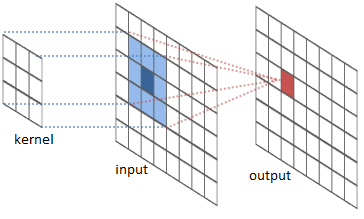


We will create a simple convolutional neural network with:
* Input: Accepts grayscale images of size 64x64 pixels.

* **Convolutional Layer Block 1**:
  * Conv1: Applies 32 filters of size 3x3 with ReLU activation.
  * Pool1: Performs max-pooling with a 2x2 window to reduce spatial dimensions.


* **Fully Connected Layers**:
  * Flattens the output from the convolutional blocks.
  * FC1: A dense layer  followed by ReLU activation.
  * Output Layer (FC2): Final dense layer with 10 neurons for classifying into 10 categories.

We will train the network on the Medical MNIST dataset as we did in the previous class.

In [ ]:
from torch import nn

class SimpleCNN(nn.Module):
    def __init__(self, input_dim=1, conv1_out_dim=4, fc1_out_dim=32, output_dim=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(input_dim, conv1_out_dim, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1_in_dim = conv1_out_dim * 32 * 32
        self.fc1 = nn.Linear(self.fc1_in_dim, fc1_out_dim)
        self.fc2 = nn.Linear(fc1_out_dim, output_dim)

    def forward(self, x, return_activations=False):
        x = self.conv1(x)
        activations = x
        x = torch.relu(x)
        x = self.pool1(x)
        x = x.view(-1, self.fc1_in_dim)  # Flatten the layer
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)

        if return_activations:
            return x, activations

        return x

# Initialize the model
model = SimpleCNN()
model

SimpleCNN(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(trainable_params)

131474


To compute the number of trainable parameters in the provided SimpleCNN model, we will break down the calculation based on each layer that has parameters (weights and biases) that can be trained:

### Convolutional Layer (`conv1`)
- **Weights**: `4 * 1 * 3 * 3 = 36`
- **Biases**: `4` (one for each output channel)
- **Total parameters in `conv1`**: $36 + 4 = 40$

### Fully Connected Layer 1 (`fc1`)
Given `conv1_out_dim = 4`, and after pooling, the feature map size remains $32 \times 32$, leading to:
- **Weights**: The number of input features to `fc1` is `4 * 32 * 32 = 4096`. The number of output features is `32`. Thus, the weights count is `4096 * 32 = 131072`.
- **Biases**: One bias per output feature gives `32`.
- **Total parameters in `fc1`**: $131072 + 32 = 131104$

### Fully Connected Layer 2 (`fc2`)
For the second fully connected layer transitioning to the output:
- **Weights**: The calculation here is `fc1_out_dim * output_dim = 32 * 6 = 192`.
- **Biases**: Corresponding to the output dimension, there are `6` biases.
- **Total parameters in `fc2`**: $192 + 6 = 198$

### Total Trainable Parameters in the Model
The sum of the parameters across all layers is:
- $40 \, (\text{from conv1}) + 131104 \, (\text{from fc1}) + 198 \, (\text{from fc2}) = 131342$

In [ ]:
#@title Compare model with the previously seen Neural Network
# class NeuralNetwork(nn.Module):

#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(NeuralNetwork, self).__init__()

#         self.flatten = nn.Flatten()
#         self.linear1 = nn.Linear(input_dim, hidden_dim) # (batch_size, 64) -> (batch_size, 128)
#         self.relu1 = nn.ReLU() # Non-linear activation function
#         self.linear2 = nn.Linear(hidden_dim, hidden_dim) # (batch_size, 128, 128)
#         self.relu2 = nn.ReLU() # Non-linear activation function
#         self.linear3 = nn.Linear(hidden_dim, output_dim) # Final prediction layer. (batch_size, 128, 10)

#     def forward(self, x):
#         x = self.flatten(x)
#         x = self.linear1(x)
#         x = self.relu1(x)
#         x = self.linear2(x)
#         x = self.relu2(x)
#         x = self.linear3(x)

#         return x

Training loop

We will create a function which:

1. Iterates through the batched data
2. Does the forward pass of the batch
3. Calculates the loss
4. Does the back backpropagation

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, device, return_loss=False):

    size = len(dataloader) * batch_size

    total_loss = 0.0

    model.train()

    for batch, (x, y) in enumerate(dataloader):

        x = x.to(device)
        y = y.to(device)

        pred = model(x) # forward pass (input -> model -> prediction)
        loss = loss_fn(pred, y)

        optimizer.zero_grad() # Zero out previous gradients
        loss.backward() # Backpropagation
        optimizer.step() # Parameter update

        total_loss += loss.item()

        if batch % 25 == 0:
            loss, current = loss.item(), batch * len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    if return_loss:
      average_loss = total_loss / len(dataloader)
      return average_loss

For the evaluation loop we do not want to calculate the model's gradients nor update its parameters

In [ ]:
def test_loop(dataloader, model, loss_fn, device, return_accuracy=False):

    size = len(dataloader) * batch_size
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    model.eval()
    with torch.no_grad():
        for x, y in dataloader:

            x = x.to(device)
            y = y.to(device)

            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(dim=1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    if return_accuracy:
      return 100 * correct

In [ ]:
# Hyper-parameters
epochs = 10
learning_rate = 1e-3 # = 10**-3 = 0.001

# Loss function
criterion = nn.CrossEntropyLoss()

# Initialize the model
model = SimpleCNN().to(device)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

history = []
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loss = train_loop(train_dataloader, model, criterion, optimizer, device, return_loss=True)
    valid_accuracy = test_loop(val_dataloader, model, criterion, device, return_accuracy=True)
    history.append((train_loss, valid_accuracy))

print("Final accuracy:")
test_loop(test_dataloader, model, criterion, device)


Epoch 1
-------------------------------
loss: 2.306442  [    0/47232]
loss: 2.259763  [ 3200/47232]
loss: 2.220649  [ 6400/47232]
loss: 2.210205  [ 9600/47232]
loss: 2.163317  [12800/47232]
loss: 2.065581  [16000/47232]
loss: 2.063522  [19200/47232]
loss: 1.957915  [22400/47232]
loss: 1.942843  [25600/47232]
loss: 1.891544  [28800/47232]
loss: 1.900113  [32000/47232]
loss: 1.827581  [35200/47232]
loss: 1.712482  [38400/47232]
loss: 1.812842  [41600/47232]
loss: 1.723906  [44800/47232]
Test Error: 
 Accuracy: 26.0%, Avg loss: 1.685285 

Epoch 2
-------------------------------
loss: 1.687436  [    0/47232]
loss: 1.735312  [ 3200/47232]
loss: 1.595723  [ 6400/47232]
loss: 1.478510  [ 9600/47232]
loss: 1.506124  [12800/47232]
loss: 1.442503  [16000/47232]
loss: 1.381691  [19200/47232]
loss: 1.328974  [22400/47232]
loss: 1.228617  [25600/47232]
loss: 1.164509  [28800/47232]
loss: 1.085588  [32000/47232]
loss: 1.050480  [35200/47232]
loss: 1.025903  [38400/47232]
loss: 0.914803  [41600/47232

torch.Size([128, 1, 64, 64])


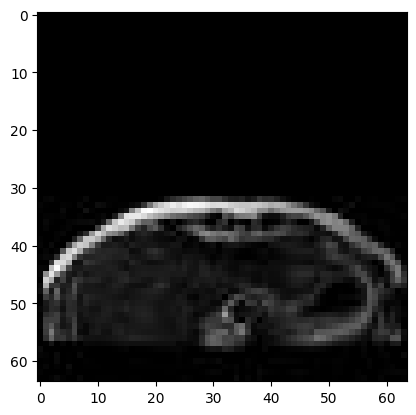

tensor([[ 1.5144,  4.5506, -0.7802, -3.0052, -0.3080,  1.8346, -2.0316, -2.1909,
         -1.1221, -2.4613]], grad_fn=<AddmmBackward0>)
1
BreastMRI


In [ ]:
# Loop through the dataloader to get a batch
for image, label in test_dataloader:
    print(image.shape)
    break  # We only need one batch for demonstration

# Access the first image in the batch and move it to CPU if necessary
im = image[3,:,:,:].cpu()  # Adding .cpu() ensures the tensor is on the CPU

# Visualize the image
plt.imshow(im.squeeze(), cmap='gray', interpolation='nearest')
plt.show()

# Predict using the model
# Add an extra batch dimension since the model expects batch input
im = im.unsqueeze(0)  # This adds a batch dimension (B, C, H, W)
model.to('cpu')
pred = model(im)
print(pred)

# Extract the predicted class with maximum probability
predicted_class = np.array(pred.argmax(dim=1)[0])
print(predicted_class)
predicted_label = le.inverse_transform([predicted_class])[0]
print(predicted_label)


# Evaluation metrics for multi-class classification


### Confusion Matrix

A table used to describe the performance of a classification model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

*   **TP**: True Positives: The cases in which the model correctly predicted the positive class.
*   **TN**: True Negatives: The cases in which the model correctly predicted the negative class.
*   **FP**: False Positives: The cases in which the model incorrectly predicted the positive class.
*   **FN**: False Negatives: The cases in which the model incorrectly predicted the negative class.

**Matrix Structure:**

|  | Predicted Positive | Predicted Negative |
| --- | --- | --- |
| Actual Positive | TP | FN |
| Actual Negative | FP | TN |

* * *

### Accuracy

The ratio of correctly predicted observations to the total observations.

$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$
* * *

### Precision

The ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions.

$
\text{Precision} = \frac{TP}{TP + FP}
$
* * *

### Recall (Sensitivity)

The ratio of correctly predicted positive observations to all observations in the actual class. It is also known as sensitivity or the true positive rate.

$
\text{Recall} = \frac{TP}{TP + FN}
$


**Recall vs Precision:**
It may be valuable to prioritize one over the other in cases where the outcome of a false positive or false negative is costly. For example, in **medical diagnosis**, a false positive test can lead to unnecessary treatment and expenses. In this situation, it is useful to value precision over recall. In other cases, the cost of a false negative is high. For instance, the cost of a false negative in **fraud detection** is high, as failing to detect a fraudulent transaction can result in significant financial loss.

* * *
### F1 Score

The weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is especially useful when the classes are imbalanced.

$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$




In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def evaluate_model(dataloader, model, device):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            model.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute the confusion matrix and other metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Evaluating on test dataset:")
evaluate_model(test_dataloader, model, device)

Evaluating on test dataset:
Confusion Matrix:
[[961   0   0  42   0   0]
 [  0 868   0   0   0   0]
 [  2   1 990   5   5   4]
 [ 11   0   0 971   0   0]
 [  8   2   6   1 959  40]
 [ 10   1   0  42   6 961]]
Accuracy: 0.9685
Precision: 0.9697
Recall: 0.9693
F1 Score: 0.9692


### Multiclass F1 Score Calculation Options

When evaluating multiclass classification models using the `f1_score` function, the `average` parameter can be set to one of three methods to adjust how the score is computed:

#### `weighted`
Calculates the F1 score for each class separately and averages them, weighting by the number of true instances in each class. This method benefits classes with more samples.
$ F1_{\text{weighted}} = \sum (F1_{\text{class}_i} \times \text{proportion of class } i) $

#### `micro`
Computes the F1 score using global counts for True Positives, False Negatives, and False Positives, treating all classes equally.
$ F1_{\text{micro}} = \frac{2 \times \text{TP}}{2 \times \text{TP} + \text{FP} + \text{FN}} $

#### `macro`
Calculates the F1 score for each class independently and averages them without weighting, equally emphasizing each class.
$ F1_{\text{macro}} = \frac{\sum F1_{\text{class}_i}}{\text{number of classes}} $

### Key Differences
- **Micro**: Global performance, equal emphasis on all classes.
- **Macro**: Average performance, each class equally important.
- **Weighted**: Favors majority classes, weighted by class size.

These options provide flexibility in F1 score calculation to align with specific evaluation needs and class distribution concerns.

---

In [ ]:
def my_confusion_matrix(y_true, y_pred):
    # WRITE YOUR CODE HERE
    unique_classes = np.unique(y_true)
    confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)

    for i, true in enumerate(unique_classes):
      for j, predicted in enumerate(unique_classes):
        confusion_matrix[i,j] = np.sum((y_true == true) & (y_pred == predicted))

    return confusion_matrix


def my_accuracy_score(y_true, y_pred):
    # WRITE YOUR CODE HERE
    return correct_predictions / total_predictions

def my_precision_score(y_true, y_pred):
    # WRITE YOUR CODE HERE

    return precision / len(classes)

def my_recall_score(y_true, y_pred):
    # WRITE YOUR CODE HERE
    return recall / len(classes)

def my_f1_score(y_true, y_pred):
    # WRITE YOUR CODE HERE
    return f1

def my_evaluate_model(dataloader, model, device):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            model.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute metrics
    conf_matrix = my_confusion_matrix(y_true, y_pred)
    # accuracy = my_accuracy_score(y_true, y_pred)
    # precision = my_precision_score(y_true, y_pred)
    # recall = my_recall_score(y_true, y_pred)
    # f1 = my_f1_score(y_true, y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)
    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    # print(f"F1 Score: {f1:.4f}")

# Assuming test_dataloader, model, and device are defined elsewhere
print("Evaluating on test dataset:")
my_evaluate_model(test_dataloader, model, device)

## EXPECTED OUTCOME:
# Evaluating on test dataset:
# Confusion Matrix:
# [[943   0   0  64   0   0]
#  [  0 917   2   0   0   0]
#  [  2   1 974   5   4   6]
#  [  0   0   0 980   0   0]
#  [  6   2  10   5 959  34]
#  [  5   2   1  46  14 914]]
# Accuracy: 0.9646
# Precision: 0.9664
# Recall: 0.9651
# F1 Score: 0.9650

Evaluating on test dataset:
Confusion Matrix:
[[961   0   0  42   0   0]
 [  0 868   0   0   0   0]
 [  2   1 990   5   5   4]
 [ 11   0   0 971   0   0]
 [  8   2   6   1 959  40]
 [ 10   1   0  42   6 961]]


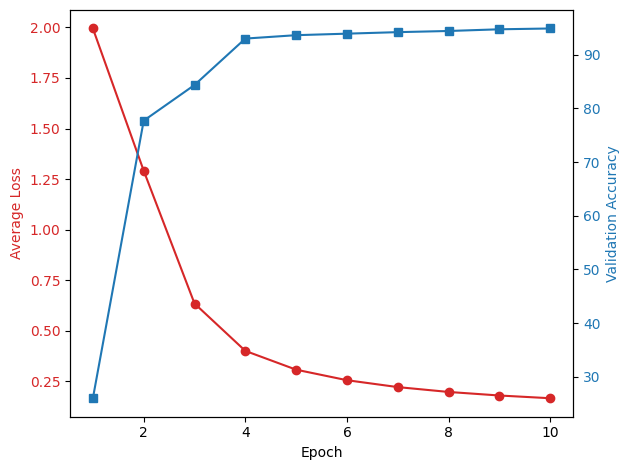

In [ ]:
# Let's visualize the average Loss during Training and Validation Accuracy, for the best model.

avg_losses, val_accuracies = zip(*history)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Average Loss', color=color)
ax1.plot(range(1, len(avg_losses) + 1), avg_losses, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Validation Accuracy', color=color)
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

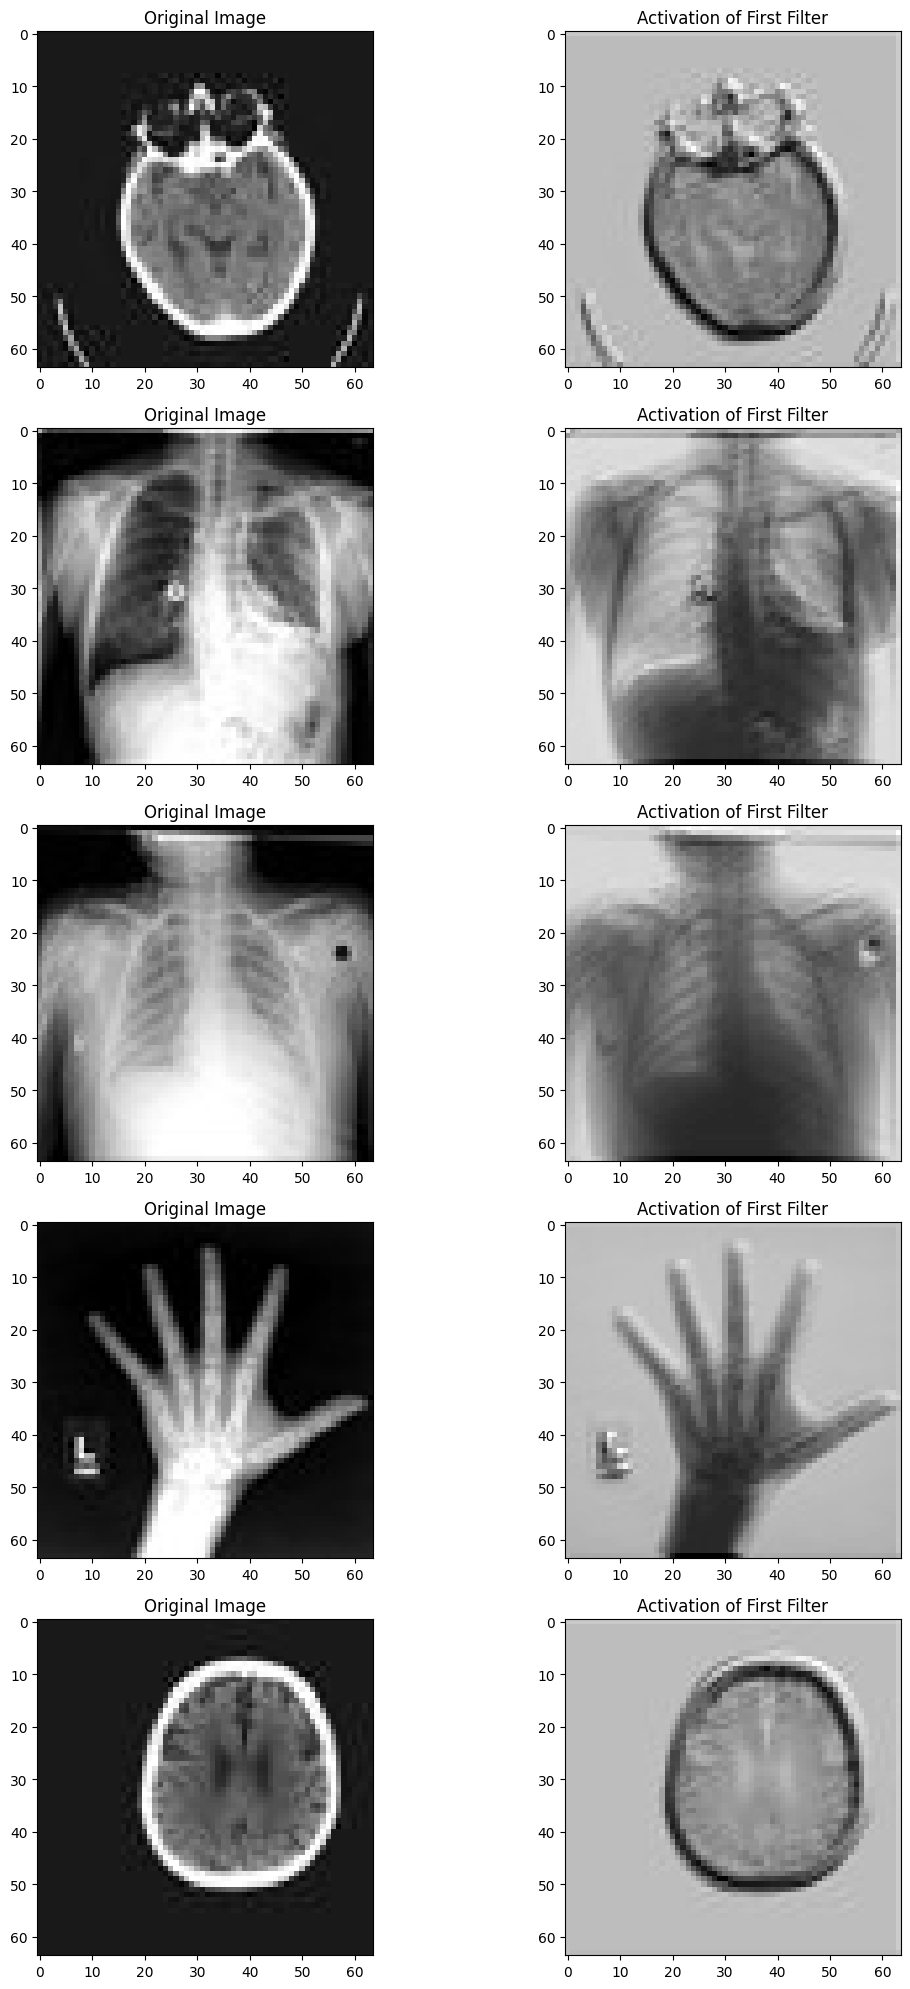

In [ ]:
def visualize_activations(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    images, _ = next(iter(dataloader))  # Get the first batch of images

    # Assuming the model is already transferred to the correct device (CPU or GPU)
    # and images are normalized in the same way as during training
    _, activations = model(images.to(device), return_activations=True)

    # Move activations to CPU and convert to numpy for visualization
    activations = activations.cpu().detach().numpy()

    # Visualize the first 5 images and their corresponding activations
    fig, axes = plt.subplots(5, 2, figsize=(12, 20))
    for i in range(5):
        img = images[i].squeeze().cpu().detach().numpy()  # Assuming grayscale for simplicity
        activation = activations[i].squeeze()

        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title('Original Image')

        # You might want to select a specific filter to visualize or average them
        # Here we show the activation of the first filter as an example
        axes[i, 1].imshow(activation[0], cmap='gray')  # First filter activation
        axes[i, 1].set_title('Activation of First Filter')

    plt.tight_layout()
    plt.show()

# Assuming model and train_dataloader are defined
visualize_activations(model, train_dataloader)

In [ ]:
# #@title larger CNN
# from torch import nn

# class SimpleLargerCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         # Convolutional layer block 1
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
#         self.relu1 = nn.ReLU()
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

#         # Convolutional layer block 2
#         self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
#         self.relu2 = nn.ReLU()
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

#         # Fully connected layers
#         self.fc1 = nn.Linear(in_features=64*7*7, out_features=600)
#         self.relu3 = nn.ReLU()
#         self.fc2 = nn.Linear(in_features=600, out_features=120)
#         self.relu4 = nn.ReLU()
#         self.fc3 = nn.Linear(in_features=120, out_features=10) # 10 classes in Fashion MNIST

#     def forward(self, x):
#         # Implement the forward pass
#         x = self.pool1(self.relu1(self.conv1(x)))
#         x = self.pool2(self.relu2(self.conv2(x)))

#         # Flatten the output for the fully connected layers
#         x = x.view(-1, 64*7*7)

#         # Fully connected layers
#         x = self.relu3(self.fc1(x))
#         x = self.relu4(self.fc2(x))
#         x = self.fc3(x)

#         return x

# # Initialize the model
# model = SimpleLargerCNN()